In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
!ls

drive  sample_data


In [ ]:
# ! pip install -q kaggle

In [ ]:
# import os
# os.environ['username'] = 'rekhalodhi' # username from the json file
# os.environ['key'] = 'b3a5d08ff70b9f6c085a23d12bc9b1a0' # key from the json file

In [ ]:
# pwd

'/content'

In [ ]:
# %cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
# !mv .kaggle /root/              #move file to te root directory

In [ ]:
%cd /content/drive/MyDrive/EBMRS

/content/drive/MyDrive/EBMRS


In [ ]:
# !kaggle datasets download -d deadskull7/fer2013

 91% 88.0M/96.6M [00:01<00:00, 94.3MB/s]
100% 96.6M/96.6M [00:01<00:00, 86.7MB/s]


In [ ]:
pwd

'/content/drive/MyDrive/EBMRS'

In [ ]:
!ls

data  fer2013.zip


In [ ]:
# !unzip '/content/drive/MyDrive/EBMRS/fer2013.zip' -d '/content/drive/MyDrive/EBMRS/data/'

Archive:  /content/drive/MyDrive/EBMRS/fer2013.zip
  inflating: /content/drive/MyDrive/EBMRS/data/fer2013.csv  


In [ ]:
path = r'/content/drive/MyDrive/EBMRS/data/fer2013.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [ ]:
df.shape

(35887, 3)

In [ ]:
df['pixels'].shape

(35887,)

In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


# Here we will find that what is the shape of the pictures in this dataset.

In [ ]:
pix = df.pixels.apply(lambda x: np.array(x.split(' ')).astype('float32'))

In [ ]:
pix[0].shape

(2304,)

In [ ]:
# m x n matrix
m = np.sqrt(pix[0].shape[0]) 

In [ ]:
print(f'shape of the pictures in the dataset "m x n": "{m} X {m}"')

shape of the pictures in the dataset "m x n": "48.0 X 48.0"


In [ ]:
df_copy = df.copy(deep = True)

In [ ]:
df_copy['pixels_value'] = pix

In [ ]:
df_copy = df_copy.drop(columns = 'pixels')

In [ ]:
df_copy.head()

,emotion,Usage,pixels_value
0,0,Training,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...."
1,0,Training,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111..."
2,2,Training,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161..."
3,4,Training,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...."
4,6,Training,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df_copy.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [ ]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

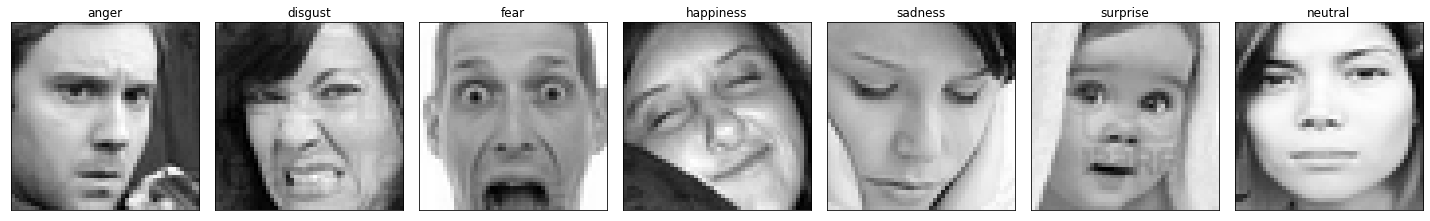

In [ ]:
k = 0
plt.figure(figsize = (20,20))
for label in sorted(df.emotion.unique()):
    for j in range(1):
        px = df_copy[df_copy.emotion==label].pixels_value.iloc[k]
        px = px.reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px , cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [ ]:
df_copy.columns

Index(['emotion', 'Usage', 'pixels_value'], dtype='object')

In [ ]:
df_copy['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
'''Check if there is any vlue greater then 255'''

df_copy.pixels_value.apply(lambda x: any(x/255 > 1)).unique()      #that means there is no pixel having value greater then 255

array([False])

# Splitting data into train, validation ad test set

In [ ]:
X_train = df_copy.pixels_value[df_copy['Usage'] == 'Training']
Y_train = df_copy.emotion[df_copy['Usage'] == 'Training']
print(f'Shape of the train data: {X_train.shape}\nShape of the train target: {Y_train.shape}')

Shape of the train data: (28709,)
Shape of the train target: (28709,)


In [ ]:
X_val = df_copy.pixels_value[df_copy['Usage'] == 'PublicTest']
Y_val = df_copy.emotion[df_copy['Usage'] == 'PublicTest']
print(f'Shape of the train data: {X_val.shape}\nShape of the train target: {Y_val.shape}')

Shape of the train data: (3589,)
Shape of the train target: (3589,)


In [ ]:
X_test = df_copy.pixels_value[df_copy['Usage'] == 'PrivateTest']
Y_test = df_copy.emotion[df_copy['Usage'] == 'PrivateTest']
print(f'Shape of the train data: {X_test.shape}\nShape of the train target: {Y_test.shape}')

Shape of the train data: (3589,)
Shape of the train target: (3589,)


# Creating convolution neural network

In [ ]:
X = df_copy['pixels_value']
X = np.stack(X, axis=0)
Y = np.array(df_copy['emotion'])

In [ ]:
X.shape

(35887, 2304)

In [ ]:
Y.shape

(35887,)